## Ejemplo: Filtro paso bajo en el dominio de Fourier

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

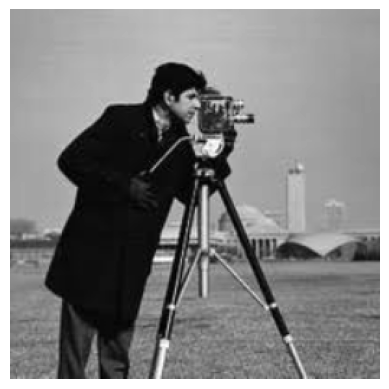

In [2]:
plt.imshow(img, cmap='gray')
plt.axis('off')

Transformada de Fourier

In [3]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

In [5]:
fshift.shape

(256, 256)

C:\Users\USER\AppData\Local\Temp\ipykernel_25096\1449919022.py:6: RuntimeWarning: invalid value encountered in log10
  plt.subplot(131), plt.imshow(np.log10(Freal+1), cmap='gray')
C:\Users\USER\AppData\Local\Temp\ipykernel_25096\1449919022.py:8: RuntimeWarning: invalid value encountered in log10
  plt.subplot(132), plt.imshow(np.log10(Fimag+1), cmap='gray')


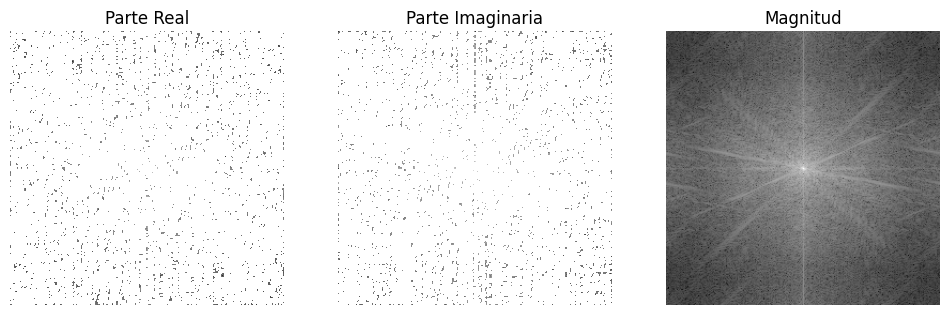

In [10]:
Freal = np.real(fshift)
Fimag = np.imag(fshift)
Fabs = np.abs(fshift)

plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(np.log10(Freal+1), cmap='gray')
plt.title('Parte Real'), plt.axis('off')
plt.subplot(132), plt.imshow(np.log10(Fimag+1), cmap='gray')
plt.title('Parte Imaginaria'), plt.axis('off')
plt.subplot(133), plt.imshow(np.log10(Fabs+1), cmap='gray')
plt.title('Magnitud'), plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Histograma de la magnitud')

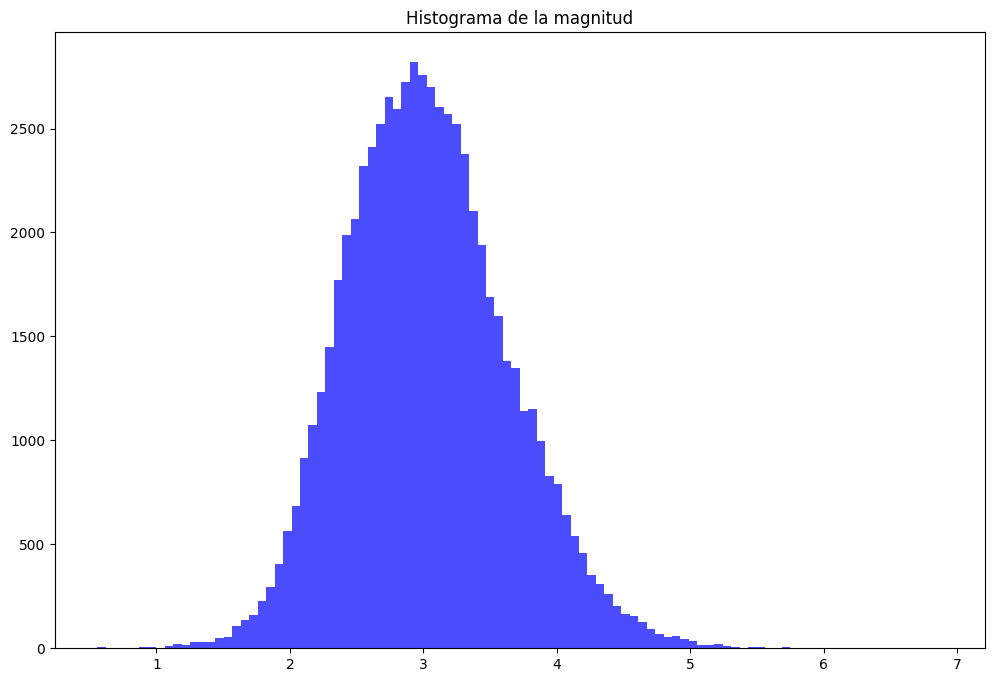

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(np.log10(Fabs+1).ravel(), bins=100, color='blue', alpha=0.7)
plt.title('Histograma de la magnitud')

Crear máscara circular de paso bajo

In [11]:
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), 30, 1, thickness=-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

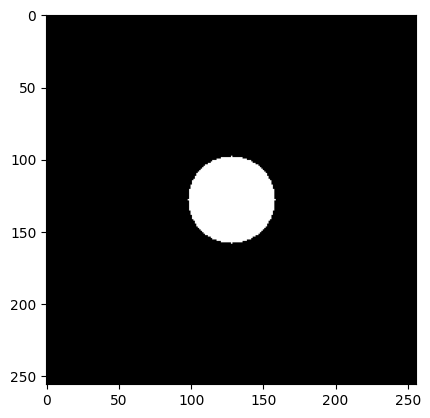

In [14]:
plt.imshow(mask, cmap='gray')

In [15]:
fshift_filtered = fshift * mask

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

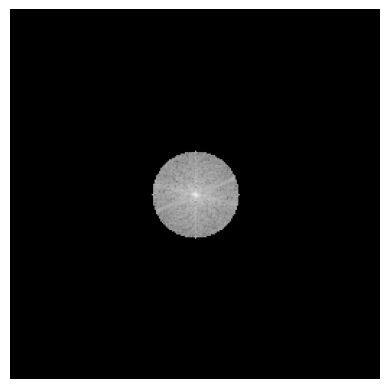

In [16]:
plt.imshow(np.log10(np.abs(fshift_filtered)+1), cmap='gray')
plt.axis('off')

Aplicar filtro


In [ ]:

f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

Mostrar resultados

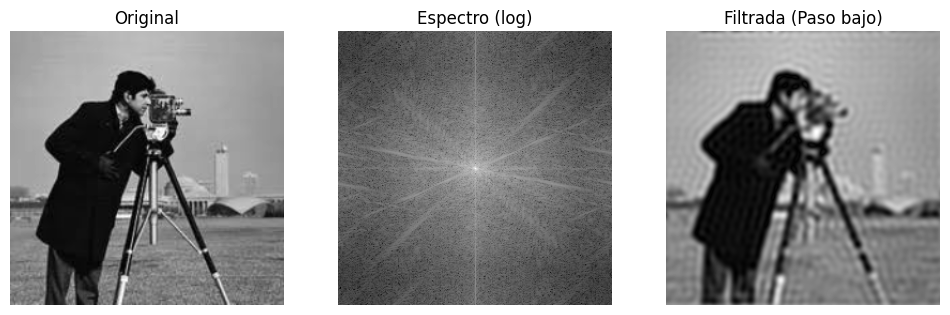

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(fshift)), cmap='gray'), plt.title('Espectro (log)'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(img_back, cmap='gray'), plt.title('Filtrada (Paso bajo)'), plt.axis('off')
plt.show()